# Project - milestone 2


Amazon cell phones evaluation platform

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
import gzip
sns.set()
sns.axes_style("darkgrid")
sns.set_palette("Set2")

# Datasets we use

### http://jmcauley.ucsd.edu/data/amazon/
- Cell Phones and Accessories reviews : Amazon reviews for phones and accessories category
- Cell Phones and Accessories metadata : Metadata of products in phones and accessories category 

### https://www.kaggle.com/arwinneil/gsmarena-phone-dataset/
- GSMArena Phone Dataset : 8000+ phones specifications scraped from GSMArena Website

<a id='#read_the_data'></a>
# Read the data


We decided to save the different datasets to CSV files because of the efficency at the loading. We have another notebook that generates the files (in */scripts* path)


In [2]:
# read the data from previosly created csv files
reviews_df = pd.read_csv('./data/reviews_cellphones.csv')

In [3]:
metadata_df = pd.read_csv('./data/metadata_cellphones.csv')

In [4]:
ratings_cols = ['reviewerID', 'asin', 'overall', 'unixReviewTime']
ratings_df = reviews_df[ratings_cols]

In [5]:
reviews_df.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,0,A1EWN6KZ4HMLT7,011040047X,S. Prescott,"[2, 2]","The case pictured is a soft violet color, but ...",1.0,Wrong color,1344902400,"08 14, 2012"
1,1,A1YX2RBMS1L9L,0110400550,Andrea Busch,"[0, 0]",Saw this same case at a theme park store for 2...,5.0,Great product,1353542400,"11 22, 2012"
2,2,A180NNPPKWCCU0,0110400550,Aniya pennington,"[3, 3]",case fits perfectly and I always gets complime...,5.0,Perfect,1374105600,"07 18, 2013"
3,3,A3HVRXV0LVJN7,0110400550,BiancaNicole,"[4, 4]",Best phone case ever . Everywhere I go I get a...,5.0,A++++,1358035200,"01 13, 2013"
4,4,A292527VPX98P8,0110400550,Cebell,"[0, 1]",It may look cute. This case started off pretty...,1.0,Do NOT GET IT!!,1353888000,"11 26, 2012"


In [6]:
metadata_df.head()

,Unnamed: 0,asin,related,title,price,salesRank,imUrl,brand,categories,description
0,0,0110400550,"{'also_bought': ['B00C56IXFG', 'B008ZUQWOK', '...",Pink &amp; White 3d Melt Ice-cream Skin Hard C...,3.33,{'Cell Phones & Accessories': 83460},http://ecx.images-amazon.com/images/I/31zn6SOL...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic...",Pink & White 3D Melt Ice-Cream Skin Hard Case ...
1,1,011040047X,"{'buy_after_viewing': ['B008RU7UL2', 'B00698LY...",Purple Hard Case Cover for Iphone 4 4s 4g with...,1.94,{'Cell Phones & Accessories': 495795},http://ecx.images-amazon.com/images/I/41WCZc2d...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic...",Purple Hard Case Cover for iPhone 4 4S 4G With...
2,2,0195866479,"{'buy_after_viewing': ['B00530RXP2', 'B004SH9B...",Hello Kitty Light-weighted Chrome Case Black C...,2.94,{'Cell Phones & Accessories': 371302},http://ecx.images-amazon.com/images/I/41fy1%2B...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic...","Thin and light weighted,\nCase's unique design..."
3,3,0214514706,"{'buy_after_viewing': ['B0042FV2SI', 'B00869D2...",Cool Summer Breeze in the Ocean Beach Collecti...,0.94,{'Cell Phones & Accessories': 778100},http://ecx.images-amazon.com/images/I/415cmp6Q...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic...",Product Name: Cool Summer Breeze In The Ocean...
4,4,0214714705,"{'buy_after_viewing': ['B008EU7HRM', 'B00869D2...",Cool Summer Breeze In The Ocean Beach Collecti...,5.79,{'Cell Phones & Accessories': 654894},http://ecx.images-amazon.com/images/I/41XDwPt2...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic...",Product Name: Cool Summer Breeze In The Ocean...


In [7]:
ratings_df.head()

,reviewerID,asin,overall,unixReviewTime
0,A1EWN6KZ4HMLT7,011040047X,1.0,1344902400
1,A1YX2RBMS1L9L,0110400550,5.0,1353542400
2,A180NNPPKWCCU0,0110400550,5.0,1374105600
3,A3HVRXV0LVJN7,0110400550,5.0,1358035200
4,A292527VPX98P8,0110400550,1.0,1353888000



# Descriptive statistics
 

## Reviews analysis

First, we take a look at the entire reviews dataset for cellphones and accessories.

In [8]:
unique_reviewers = reviews_df['reviewerID'].unique()
unique_reviewers_percent = len(unique_reviewers) / reviews_df.shape[0] *100
unique_products = reviews_df['asin'].unique()
unique_products_percent = len(unique_products) / reviews_df.shape[0] *100
print ("Shape: ", reviews_df.shape)
print ("Ratings values: ", reviews_df.overall.unique())
print ("Min review unix time: ", reviews_df.unixReviewTime.min())
print ("Max review unix time: ", reviews_df.unixReviewTime.max())
print ("Percentage of unique reviewers: ", unique_reviewers_percent)
print ("Percentage of unique products: ", unique_products_percent)

Shape:  (3447249, 10)
Ratings values:  [ 1.  5.  2.  3.  4.]
Min review unix time:  942796800
Max review unix time:  1406073600
Percentage of unique reviewers:  65.5898369975595
Percentage of unique products:  9.273423532793831


### Overall ratings

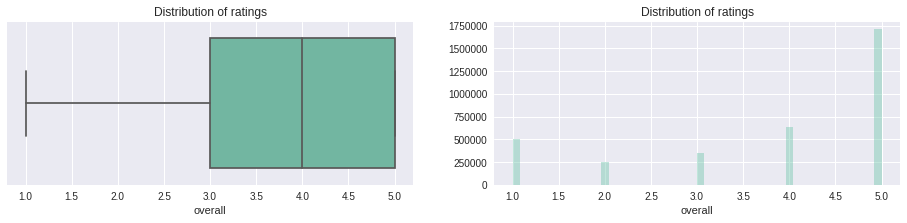

In [229]:
fig, ax = plt.subplots(1, 2, figsize=(16,3))
ax1 = sns.boxplot(reviews_df.overall, ax=ax[0])
ax2 = sns.distplot(reviews_df.overall, ax=ax[1], kde=False)
ax1.set_title('Distribution of ratings')
ax2.set_title('Distribution of ratings')
plt.show()

### Reviews through time
We plot the distribution of reviews through years, and for 2013.

In [10]:
#Re-compute datetime with unixReviewTime
reviews_df['datetime'] = pd.to_datetime(reviews_df.unixReviewTime, unit='s')

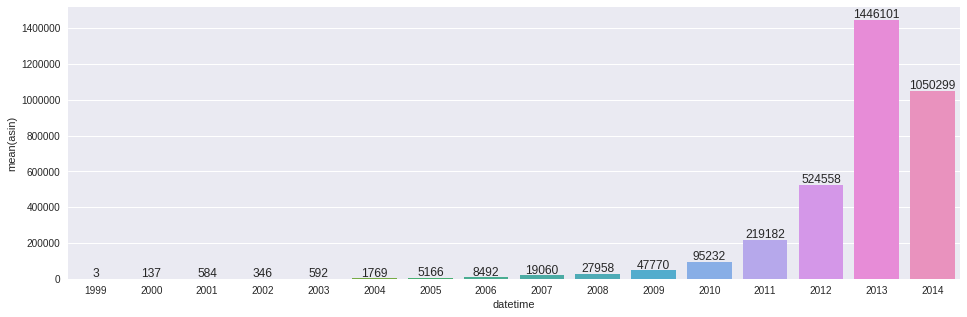

In [11]:
#By year in general
year = reviews_df.groupby([reviews_df.datetime.dt.year])['asin'].count()
fig, ax = plt.subplots(figsize=(16,5))
year_df = pd.DataFrame(year)
ax = sns.barplot(year_df.index, year_df.asin)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10000,
            '{:1.0f}'.format(height),
            ha="center") 

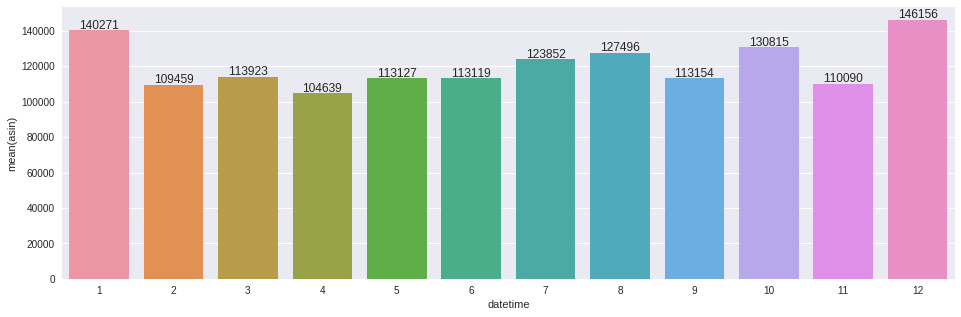

In [12]:
#In 2013 for example
year = reviews_df.groupby([reviews_df.datetime.dt.year, reviews_df.datetime.dt.month])['asin'].count()
year_2013 = year[(2013, )]
fig, ax = plt.subplots(figsize=(16,5))
year_2013_df = pd.DataFrame(year_2013)
ax = sns.barplot(year_2013_df.index, year_2013_df.asin)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.0f}'.format(height),
            ha="center") 

## Metadata dataset

We also use the metadata dataset, to get more details on the products.

### Row data analysis
Here, we analyse the dataset that contains phones and accessories.

In [13]:
null_price = metadata_df.price.isnull().sum()
null_price_percent = null_price / metadata_df.shape[0] *100
null_brand = metadata_df.brand.isnull().sum()
null_brand_percent = null_brand / metadata_df.shape[0] *100
print ("Number of products: ", metadata_df.shape[0])
print ("Percentage of null prices: ", null_price_percent)
print ("Percentage of null brands: ", null_brand_percent)

Number of products:  346793
Percentage of null prices:  18.4098294948
Percentage of null brands:  77.3873751777


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0680af34a8>]], dtype=object)

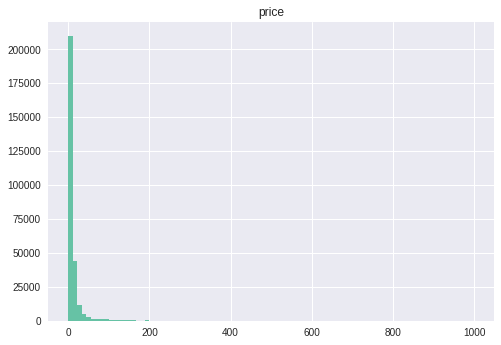

In [14]:
metadata_df.hist(column='price', bins=90)

As we can see, we have missing values concerning the prices.

## Phones analysis

We decide to create a new meta dataframe that only contains information about phones.

In [15]:
phones_df = metadata_df[metadata_df.categories.str.
            startswith("[['Cell Phones & Accessories', 'Cell Phones', 'Unlocked ")]
phones_df = phones_df[(pd.notnull(phones_df['brand'])) & (phones_df['brand'] != '')]
print("Phones count:", len(phones_df))
phones_df.head()

Phones count: 1343


,Unnamed: 0,asin,related,title,price,salesRank,imUrl,brand,categories,description
2861,2861,B0002Z8CSA,"{'also_viewed': ['B007N0RAXK', 'B00BNFLGM2', '...",Motorola V400 Unlocked Cell Phone--U.S. Versio...,81.95,{'Cell Phones & Accessories': 602817},http://ecx.images-amazon.com/images/I/4142320E...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",The quad-band Motorola V400 cell phone feature...
3702,3702,B0009FCAJA,"{'also_bought': ['B000IN5ZHM', 'B0016JDE34', '...","Motorola RAZR V3 Unlocked Phone with Camera, a...",69.99,{'Cell Phones & Accessories': 10173},http://ecx.images-amazon.com/images/I/41294T68...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",When the Motorola RAZR V3 was launched last ye...
5456,5456,B000GGO5KO,"{'also_viewed': ['B000PEOLAG', 'B00A6D9WLY', '...",Sony Ericsson M600i Unlocked Cell Phone with 3...,120.00,{'Cell Phones & Accessories': 1178113},http://ecx.images-amazon.com/images/I/21I6mmuz...,Sony Ericsson,"[['Cell Phones & Accessories', 'Cell Phones', ...",Put your office in your pocket with the incred...
6575,6575,B000J0YH9Q,"{'also_viewed': ['B0014TAFPG'], 'buy_after_vie...",Motorola RIZR Z3 Unlocked GSM Quadband Cell Ph...,99.99,{'Cell Phones & Accessories': 697207},http://ecx.images-amazon.com/images/I/51opABnP...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",The Motorola RIZR Z3 features an ultra smooth ...
6654,6654,B000J6EXTY,"{'also_bought': ['B000IN5ZHM', 'B0009H2M1Y', '...",Motorola RAZR V3i Dolce &amp; Gabbana Unlocked...,69.95,{'Cell Phones & Accessories': 16025},http://ecx.images-amazon.com/images/I/41VTMFSG...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",You've probably seen the wildly popular Motoro...


### Brand names

We decide to use a public dataset from GSMArena, which contains more than 8000 phones specifications scraped GSMArena Website.<br>
This dataset is available here: https://www.kaggle.com/arwinneil/gsmarena-phone-dataset/version/1 <br>
The last update is Jun 2017.

In [16]:
gsmarena_df = pd.read_csv('./data/phone_dataset.csv', error_bad_lines=False)
gsmarena_df.head()

b'Skipping line 821: expected 40 fields, saw 41\nSkipping line 6060: expected 40 fields, saw 41\nSkipping line 6663: expected 40 fields, saw 41\n'


,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,...,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
0,Acer,Iconia Talk S,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 1900 / 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 8(900)| 20...,HSPA 42.2/11.5 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,...,4.0| A2DP,Yes with A-GPS GLONASS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170.0,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
1,Acer,Liquid Z6 Plus,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,...,4.0| A2DP,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Fingerprint (front-mounted)| accelerometer| pr...,Removable Li-Po 4080 mAh battery,Black| White,250.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
2,Acer,Liquid Z6,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA LTE,Yes,Yes,2016 August,...,Yes,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Removable Li-Ion 2000 mAh battery,Black| White,120.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
3,Acer,Iconia Tab 10 A3-A40,No cellular connectivity,N/A,NaN,NaN,NaN,No,No,2016 April,...,Yes,NaN,NaN,No,microUSB 2.0,Accelerometer,Non-removable Li-Ion battery,Black,230.0,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
4,Acer,Liquid X2,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 1900 / 2100 - Europe| Taiwan,LTE 800 / 1800 / 2100 / 2600 - Europe,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2015 April,...,4.0| A2DP| LE,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity| compass,Removable Li-Po 4020 mAh battery,Black| Gold,230.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...


This dataset enables to filter the phones in our Amazon Phones dataframe using the phone brand.

In [17]:
list_brands_accepted = gsmarena_df.brand.str.lower().unique()

In [18]:
#Keep only phones contained in list of accepted brands
print(phones_df['brand'].str.lower().unique())
brands_number_before = len(phones_df['brand'].str.lower().unique())
phones_df_filtered = phones_df[phones_df['brand'].str.lower().isin(list_brands_accepted)]
brands_number_after = len(phones_df_filtered['brand'].str.lower().unique())
print('')
print('Before processing (# of brands, # of phones):', brands_number_before, len(phones_df))
print('After processing (# of brands, # of phones):', brands_number_after, len(phones_df_filtered))


['motorola' 'sony ericsson' 'nokia' 'global star' 'sony' 'blackberry' 'lg'
 'htc' 'apple' 'pharos' 'panasonic' 't mobile' 'palm' 'cricket' 'telular'
 't-mobile' 'curve 8350i' 'samsung' 'inmarsat' 'vip-top sales watch phone'
 'dell' 'droid' 'bolo brands' 'unlocked-cell-phones' 'huawei' 'pantech'
 'hp' 'at&amp;t' 'verizon' 'victor' 'cellularfactory' 'sharp' 'unknown'
 'casio' 'generic' 's lll' 'ulefone' 'phone merchant' 'greatcall'
 'novatel wireless' 'star' 'unnecto' 'alcatel' 'jeg &amp; sons, inc.' 'svp'
 'android' 'gray' 'fujimoto dengyo' 'newcay' 'flylink' 'ebest' 'px phone'
 'digital family' 'huawei honor' 'albanese' 'jiayu g3t' 'kyocera' 'weikin'
 'lenovo' 'zte' 'blu' 'fusion 2' 'etree' 'caterpillar' 'indigi'
 'huhushop(tm)' 'zopo' 'toto' 'tomtop' 'samsung galaxy s4 - google edition'
 'samsung galaxy mega' 'jiayu' 'ct-miami llc' 'terrapin' 'lumia'
 'moneysaving4you' 'nec' 'tab 3 8&quot;' 'ocean cross' 'unassigned' 'thl'
 'dracotek' 'yezz wireless' 'u watch' 'eson' 'lxl' 'migo' 'gif

### Phone prices

In [19]:
print('Number of phones with NaN price:', phones_df_filtered.price.isnull().sum())

Number of phones with NaN price: 2


We can see that the prices for almost all phones are known, and most of them are in range 50-300 euros. 

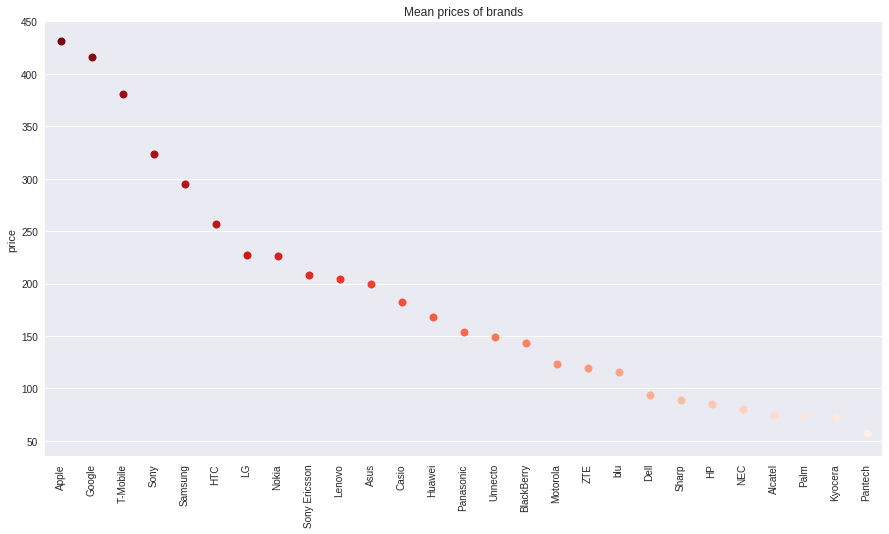

In [20]:
fig, ax = plt.subplots(figsize=(15,8))
avg_prices = phones_df_filtered.groupby('brand')['price'].mean().sort_values(ascending=False)
d = [i for i in range(0, len(avg_prices))]
ax = sns.stripplot(d, avg_prices,size=8, palette="Reds_r")
ax.set_xticklabels(avg_prices.index, rotation='vertical')
ax.set_title('Mean prices of brands')
plt.show()

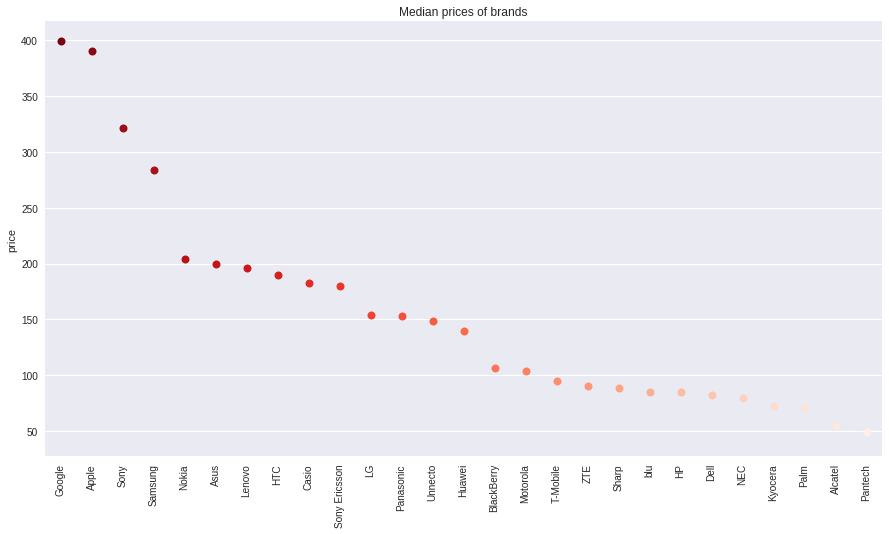

In [21]:
fig, ax = plt.subplots(figsize=(15,8))
median_prices = phones_df_filtered.groupby('brand')['price'].median().sort_values(ascending=False)
d = [i for i in range(0, len(avg_prices))]
ax = sns.stripplot(d, median_prices,size=8, palette="Reds_r")
ax.set_xticklabels(median_prices.index, rotation='vertical')
ax.set_title('Median prices of brands')
plt.show()

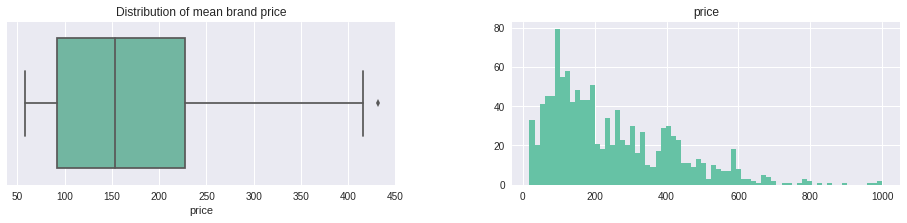

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(16,3))
ax1 = sns.boxplot(avg_prices, ax=ax[0])
ax2 = phones_df_filtered.hist(column='price', bins=70, ax=ax[1])
ax1.set_title('Distribution of mean brand price')
ax1.set_title('Distribution of mean brand price')
plt.show()

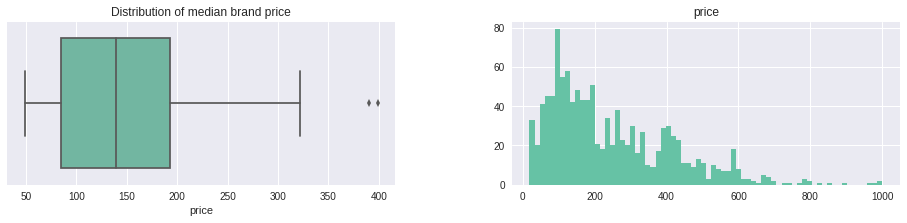

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(16,3))
ax1 = sns.boxplot(median_prices, ax=ax[0])
ax2 = phones_df_filtered.hist(column='price', bins=70, ax=ax[1])
ax1.set_title('Distribution of median brand price')
ax1.set_title('Distribution of median brand price')
plt.show()

### Number of phones per brand

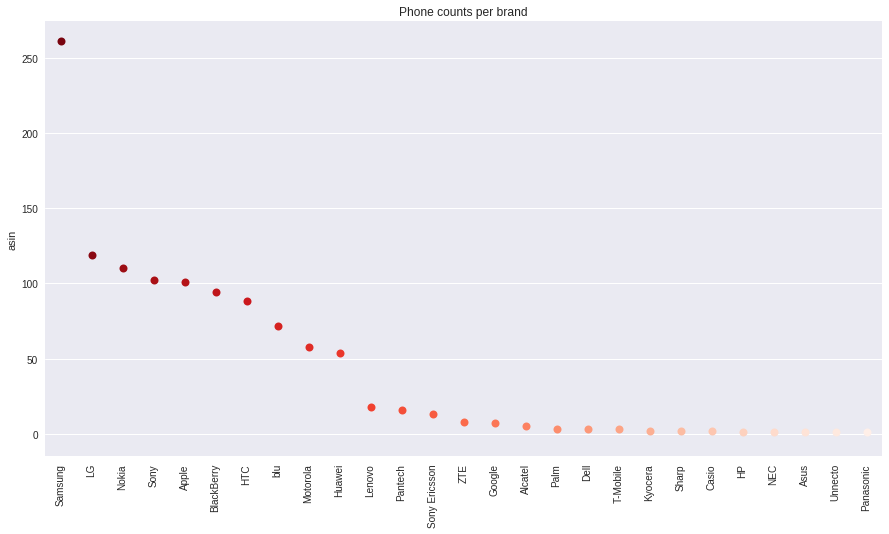

In [24]:
phone_counts = phones_df_filtered.groupby('brand')['asin'].count().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15,8))
d = [i for i in range(0, len(phone_counts))]
ax = sns.stripplot(d, phone_counts, size=8, palette="Reds_r")
ax.set_xticklabels(phone_counts.index, rotation='vertical')
ax.set_title('Phone counts per brand')
plt.show()

More than 200 phones are Samsung phones, Apple is the 5th.

## Merged dataframes for reviews and phones metadata


We will now merge these two dataframes and check statistics for new dataframe. 

In [25]:
final_df = pd.merge(phones_df_filtered, reviews_df, on='asin', how='inner')
print('Number of reviews in total:', len(final_df))

Number of reviews in total: 56222


In [26]:
final_df.head()

,Unnamed: 0_x,asin,related,title,price,salesRank,imUrl,brand,categories,description,Unnamed: 0_y,reviewerID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,datetime
0,2861,B0002Z8CSA,"{'also_viewed': ['B007N0RAXK', 'B00BNFLGM2', '...",Motorola V400 Unlocked Cell Phone--U.S. Versio...,81.95,{'Cell Phones & Accessories': 602817},http://ecx.images-amazon.com/images/I/4142320E...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",The quad-band Motorola V400 cell phone feature...,20437,A1LZEEL11U755M,A. Le,"[2, 2]","I didn't buy from this seller, but I owned thi...",5.0,sturdiest phone ever!,1240012800,"04 18, 2009",2009-04-18
1,2861,B0002Z8CSA,"{'also_viewed': ['B007N0RAXK', 'B00BNFLGM2', '...",Motorola V400 Unlocked Cell Phone--U.S. Versio...,81.95,{'Cell Phones & Accessories': 602817},http://ecx.images-amazon.com/images/I/4142320E...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",The quad-band Motorola V400 cell phone feature...,20438,A21BFCRY0I0RD7,"Jose Carlos P. Reyes ""otomed""","[4, 4]",I've been using a Motorola V190 for well over ...,5.0,Good phone for day to day use,1261958400,"12 28, 2009",2009-12-28
2,2861,B0002Z8CSA,"{'also_viewed': ['B007N0RAXK', 'B00BNFLGM2', '...",Motorola V400 Unlocked Cell Phone--U.S. Versio...,81.95,{'Cell Phones & Accessories': 602817},http://ecx.images-amazon.com/images/I/4142320E...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",The quad-band Motorola V400 cell phone feature...,20439,A2ND5GHEMRZV0D,Leonila Romualdo,"[1, 5]",order took 2 weeks because the package came ba...,2.0,motorola from freehasslecell.com,1235433600,"02 24, 2009",2009-02-24
3,3702,B0009FCAJA,"{'also_bought': ['B000IN5ZHM', 'B0016JDE34', '...","Motorola RAZR V3 Unlocked Phone with Camera, a...",69.99,{'Cell Phones & Accessories': 10173},http://ecx.images-amazon.com/images/I/41294T68...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",When the Motorola RAZR V3 was launched last ye...,37599,A36EJJUDZ37UHS,NaN,"[4, 4]",I've ordered 3 of these phones from 2 differen...,1.0,phone is nothing but problems - not authentic ...,1200096000,"01 12, 2008",2008-01-12
4,3702,B0009FCAJA,"{'also_bought': ['B000IN5ZHM', 'B0016JDE34', '...","Motorola RAZR V3 Unlocked Phone with Camera, a...",69.99,{'Cell Phones & Accessories': 10173},http://ecx.images-amazon.com/images/I/41294T68...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",When the Motorola RAZR V3 was launched last ye...,37600,A2T8YGL2PJJ93A,4004CII,"[8, 9]","I read the other reviews, heard about the drea...",2.0,What a piece of junk!,1158710400,"09 20, 2006",2006-09-20


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0695ed6748>]], dtype=object)

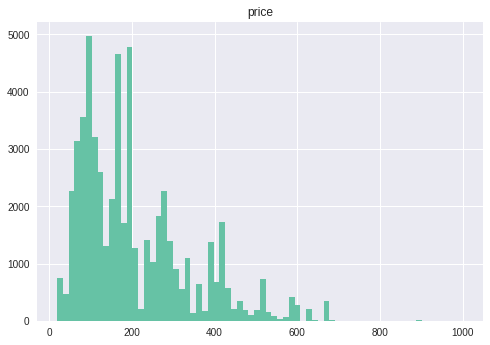

In [27]:
# Distribution of phone prices
final_df.hist(column='price', bins=70)

## Phone reviews through time

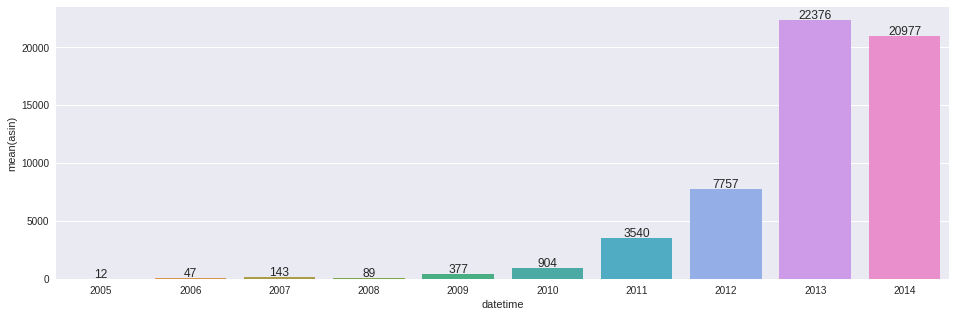

In [28]:
#By year in general
year = final_df.groupby([final_df.datetime.dt.year])['asin'].count()
fig, ax = plt.subplots(figsize=(16,5))
year_df = pd.DataFrame(year)
ax = sns.barplot(year_df.index, year_df.asin)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.0f}'.format(height),
            ha="center") 

We observe that the most important part of the reviews are from 2013-2014.

## Mean ratings of brands

In [29]:
### Top10 prominent brands
brand_ratings = final_df.groupby('brand').agg({'overall':['mean','std']})

brand_ratings_df = pd.DataFrame(brand_ratings.overall)
brand_ratings_df.sort_values('mean', ascending=False)

,mean,std
brand,,
Kyocera,4.416667,1.088300
Google,4.347534,1.160330
Panasonic,4.250000,1.035098
Sony,4.109865,1.310141
Asus,4.000000,1.549193
blu,3.949449,1.322714
Lenovo,3.921739,1.312209
Huawei,3.836177,1.458411
Samsung,3.808519,1.536949


In [30]:
# TOP 10 Products by brands
brands = np.array(phone_counts.head(10).index)
brands

array(['Samsung', 'LG', 'Nokia', 'Sony', 'Apple', 'BlackBerry', 'HTC',
       'blu', 'Motorola', 'Huawei'], dtype=object)

In [31]:
top_products = final_df.groupby(['brand','title']).agg({'overall':['mean','std'], 'asin':'count'})
top_products.columns = top_products.columns.droplevel()
top_products_df = pd.DataFrame(top_products)

## TOP 10 reviewed phones by brand

In [32]:
#TOP 10 reviewed phones
top_reviewed_brands_list = []
for brand in brands:
    top10_reviewed = top_products_df.iloc[top_products_df.index.get_level_values('brand') == brand]
    top_reviewed_brands_list.append(top10_reviewed.sort_values(['count'], ascending=False).head(10))
    
top_reviewed_brands = pd.concat(top_reviewed_brands_list)
top_reviewed_brands

mean  \
brand    title                                                          
Samsung  Samsung Galaxy S3 Mini (GT-i8190 / GT-I8200) fa...  3.872753   
         Samsung Galaxy S3 GT-i8190 Mini Blue 8GB factor...  4.046053   
         Samsung Galaxy S3 i9300 16GB - Factory Unlocked...  3.731109   
         Samsung Galaxy S3 i9300 16GB - Factory Unlocked...  3.679406   
         Samsung Galaxy Note II N7100 16GB Gray-Unlocked...  4.042424   
         SAMSUNG GALAXY S4 MINI GT-i9195 8GB-UNLOCKED In...  3.711864   
         Samsung Galaxy S4 GT-i9500 16GB Factory Unlocke...  3.613692   
         Samsung Galaxy S DUOS S7562 Unlocked GSM Phone ...  3.086514   
         Samsung Galaxy S4 White i9500 16GB Factory Unlo...  3.730667   
         Samsung Focus I917 Unlocked Phone with Windows ...  3.710884   
LG       LG Env Touch VX11000 Touch Screen Cell Phone (V...  3.297921   
         LG Optimus L9 P769 4GB Android Smartphone - T-M...  4.000000   
         LG KP500 Cookie Unlocked Phone with 3.2 MP Came...  3.524345   
         LG Cosmos VN250 Verizon Phone (POST PAID)           3.391705   
         LG GT550 Encore Unlocked Phone with 3MP Camera,...  2.725118   
         LG GT365 Neon GSM Unlocked Phone with 2 MP Came...  2.887701   
         LG Dare VX-9700 Cell Phone - Verizon or Page Plus   3.069182   
         LG A275 Black Unlocked GSM Dual SIM QuadBand Ce...  3.841772   
         LG Prime GS390 Unlocked Phone with Touchscreen ...  2.938462   
         LG Optimus L7 P705 (white) New Internatioanl Un...  3.698413   
Nokia    Nokia N8 Unlocked GSM Touchscreen Phone Featuri...  3.638150   
         Nokia C3-00 Unlocked Cell Phone (Slate) with QW...  3.980315   
         Nokia Lumia 900 Blue (Cyan) Factory Unlocked        3.600840   
         Nokia Lumia 520 8GB Unlocked GSM Windows 8 OS C...  3.858369   
         Nokia Lumia 900 Black Factory Unlocked              3.042254   
         Nokia Lumia 920 Black Factory Unlocked 32GB pho...  3.422222   
         Nokia C2-01.5 Unlocked GSM Phone with 3.2 MP Ca...  4.106509   
         Nokia Lumia 800 Unlocked GSM Phone with Windows...  3.911950   
         Nokia E7-00 Unlocked GSM Phone with Touchscreen...  3.552239   
         Nokia 6350 Unlocked GSM Flip Phone with Second ...  3.406780   
...                                                               ...   
blu      BLU Studio 5.5 D610a Unlocked Dual SIM GSM Phon...  4.124031   
         BLU Advance 4.0 Unlocked Dual SIM Phone (Black)     4.104603   
         BLU Life One L120 Unlocked Dual Sim Phone with ...  4.340541   
         BLU Studio 5.0 II Unlocked Dual SIM Phone with ...  3.754286   
         BLU Dash 5.0 D410a Unlocked Dual SIM  GSM Phone...  4.112069   
         Studio 5.5S Quad Band Unlocked (White)              4.077778   
         Studio 5.0S II Quad Band Unlocked (White)           4.132530   
         BLU Zoey Quadband Unlocked Dual SIM Phone with ...  3.697368   
         BLU Q170T Samba TV Unlocked Dual SIM Quad-Band ...  3.226667   
         BLU Life Pure Unlocked Phone (Black)                3.986486   
Motorola Motorola Moto G - Global GSM - Unlocked - 8GB (...  4.519750   
         Motorola RAZR V3 Unlocked Phone with Camera, an...  2.791667   
         Motorola Atrix 4G MB860 Unlocked GSM Phone with...  3.570667   
         Motorola RAZR V3 Unlocked Phone with Camera, an...  2.504274   
         Motorola Droid Bionic 4G LTE WiFi Android Smart...  3.286920   
         Motorola Droid 2 A955 Verizon Phone 5MP Cam, Wi...  2.921053   
         Motorola RAZR XT912 Black Verizon Wireless          3.395973   
         BlackBerry Pearl 8100 Unlocked Phone with Quad-...  2.640845   
         Motorola Defy MB525 Unlocked Cellphone with And...  3.369748   
         Motorola Droid 3 Verizon Xt862 Verizon Cell Phone   3.238095   
Huawei   Huawei Ascend Y300-0151 4GB WiFi Android Touchs...  4.141593   
         Huawei Y300 Android 4.1 Dual Core 1.0GHz, 4.0 i...  3.719101   
         Huawei U9200 Ascend P1 Unlocked Phone - B

## TOP 10 best rated phones by brand
Be careful, some phones are high-rated, but they have only one review.

In [33]:
#TOP 10 best phones
top_best_brands_list = []
for brand in brands:
    top10_best = top_products_df.iloc[top_products_df.index.get_level_values('brand') == brand]
    top_best_brands_list.append(top10_best.sort_values(['mean'], ascending=False).head(10))
    
top_best_brands = pd.concat(top_best_brands_list)
top_best_brands

mean  \
brand    title                                                          
Samsung  Samsung Galaxy Ace 3 S7275 Factory Unlocked GSM...  5.000000   
         Samsung Galaxy S3 S III Gt-i9300 16gb Titanium ...  5.000000   
         SAMSUNG GT-I9300 Galaxy S III 16 GB Unlocked Ph...  5.000000   
         Samsung Galaxy Win GT-i8552L Ceramic White Unlo...  5.000000   
         Samsung Galaxy Grand 2 Dual Sim, 8MP, 8GB, Quad...  5.000000   
         Samsung Galaxy GT-I8552 Win Dual Sim Unlocked S...  5.000000   
         Samsung Flight II SGH-A927 AT&amp;T Cell Phone      5.000000   
         Samsung Galaxy S3 Neo DUOS I9300i 16GB Unlocked...  5.000000   
         Samsung Galaxy S4 GT i9505 16GB - Purple - Fact...  5.000000   
         Samsung Galaxy S Ii Plus I9105 S2 Blue (Factory...  5.000000   
LG       LG OPTIMUS G E975 32GB BLACK ANDROID FACTORY UN...  5.000000   
         NEW Lg Optimus G Pro Black 16gb E988 5.5&quot; ...  5.000000   
         Lg G2 D802 4g 32GB Factory Unlocked Internation...  5.000000   
         Lg G2 D802 White 32gb (Factory Unlocked) 5.2&qu...  5.000000   
         Lg G2 Mini D620 White                               5.000000   
         BNIB LG G3 D855 16GB Gold Factory Unlocked 4G 3...  5.000000   
         LG Optimus L3 II E435 White Dual Sim Factory Un...  5.000000   
         NEW LG G2 D802 16GB WHITE FACTORY UNLOCKED LTE ...  5.000000   
         Lg G2 D802 32gb GOLD Unlocked                       5.000000   
         BNIB LG G3 D855 16GB Silk White Factory Unlocke...  5.000000   
Nokia    Nokia Lumia 520 Quad-Band GSM Smartphone Blue -...  5.000000   
         NOKIA 208 BLACK CELL.QB. 2.4&quot;TYPE BT 1.3MP...  5.000000   
         Nokia 106.3 Negro/black Unlocked Dualband GSM 8...  5.000000   
         Nokia Lumia 1520 White Rm-937 (Factory Unlocked...  5.000000   
         Brand New Nokia Lumia 620 Yellow Factory Unlock...  5.000000   
         Nokia 6700 SLIDE PINK Unlocked Phone                5.000000   
         Nokia 925 Lumia Black and White (White)             5.000000   
         Nokia Lumia 800 Unlocked Phone With - Purity HD...  5.000000   
         Nokia Lumia 1520 Yellow Factory Unlocked RM-937...  4.857143   
         Nokia Lumia 925 - Black                             4.800000   
...                                                               ...   
blu      BLU Diva T272T Unlocked GSM Phone with Dual SIM...  5.000000   
         BLU Dash 5.0 D410a Unlocked Dual SIM  GSM Phone...  5.000000   
         Blu LIFE 8 Unlocked (Yellow)                        4.750000   
         BLU Life One L120 Unlocked Dual Sim Phone with ...  4.340541   
         Vivo 4.8 HD Quad Band Unlocked (White)              4.333333   
         Life Pure XL Full HD, 16MP, (32 GB+3GB RAM) - F...  4.333333   
         BLU Life Play X L102A Black Unlocked GSM Dual-S...  4.285714   
         BLU Dash 5.0 D410a Unlocked Dual SIM  GSM Phone...  4.200000   
         BLU Dash D171a -Unlocked- Black                     4.200000   
         BLU Samba W Q170W Unlocked Dual SIM Quad-Band I...  4.142857   
Motorola MOTOROLA A1200 WHITE GSM MP3 PDA CAMERA CELLPHONE   5.000000   
         Motorola MOTORIZR Z8 Black Unlocked Triband GSM...  5.000000   
         Motorola Moto G - Global GSM - Unlocked - 8GB (...  4.519750   
         Motorola Tundra VA76r Rugged GSM Cell Phone AT&...  4.266667   
         Motorola Droid RAZR MAXX Limited Edition XT912 ...  4.250000   
         Motorola Atrix HD MB886 Unlocked GSM 4G LTE And...  4.181818   
         Motorola Droid RAZR M XT907 8GB LTE 4G White - ...  4.083333   
         Motorola Tundra Va76r (Locked to At&amp;t) Mp3 ...  4.083333   
         Motorola EX223 Unlocked GSM Phone with Dual SIM...  4.076923   
         Motorola MOTO G XT1033 8GB Unlocked GSM Dual-SI...  4.000000   
Huawei   UNLOCKED Huawei Ascend Y530 Google Android Phon...  5.000000   
         Huawei MediaPad X1 Smart Cell Phone Hisilicon K...  5.000000   
         Huawei G610 Unlocked Android Smartphone (

## Correlations
A high price does not mean necessarily a good grade.

In [34]:
#Correlation between price and overall
final_df['price'].corr(final_df['overall'])

0.13570524839163942

## Important words in general in reviews

Here, we want to show the feature importance of words, correlated with the total overall for each brands.<br>
We use CountVectorizer in order to convert the collection of reviews to a matrix of token counts.<br>
Then, this matrix containing all the features is pushed in SelectKBest() function which reduce the dimension (we choose 10) according to the k highest scores.<br>

Then, we plot the correlation between words. A high correlation means that the two words are highly correlated with the rate of the products (good or bad).

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest

/home/kristina/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


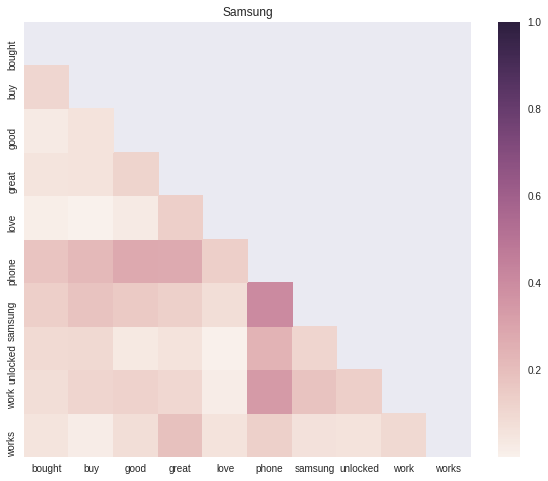

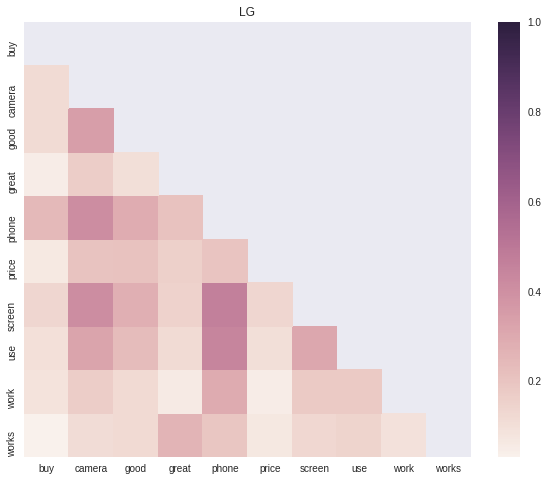

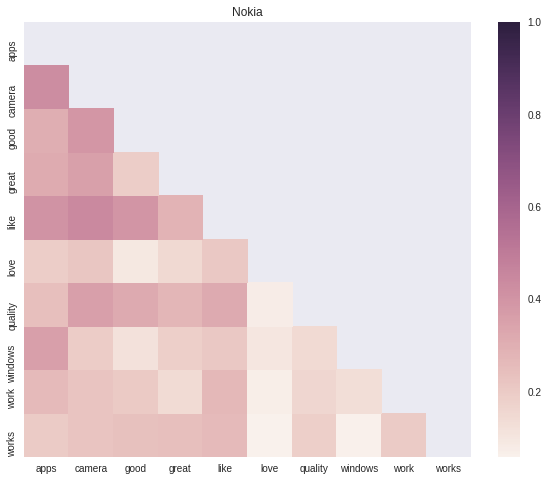

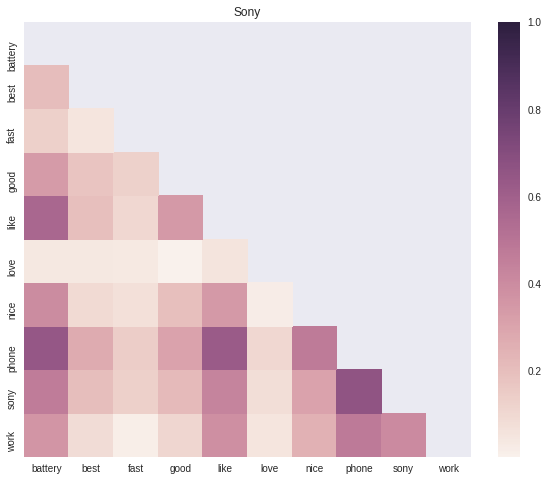

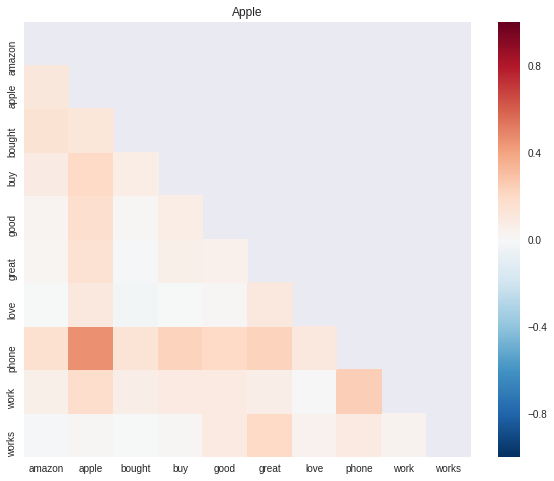

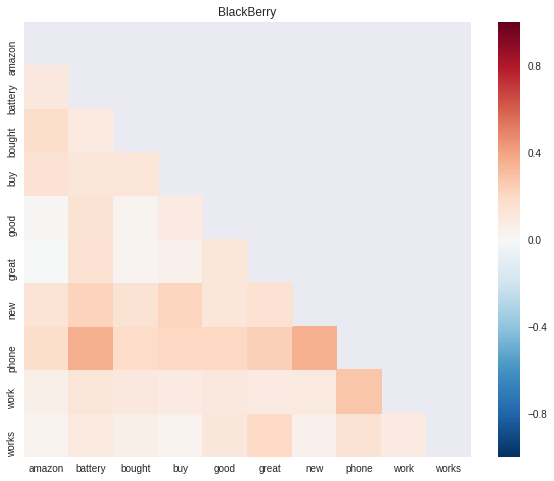

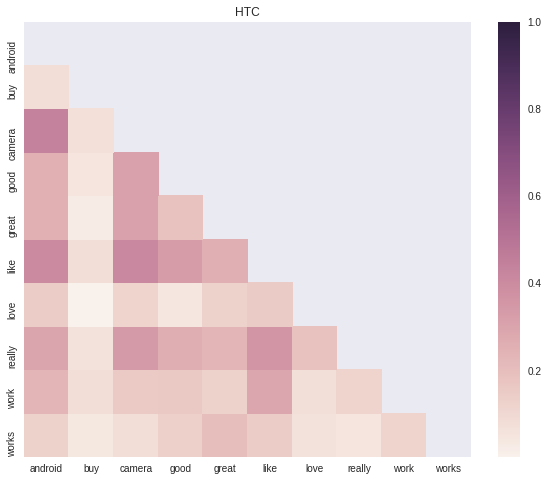

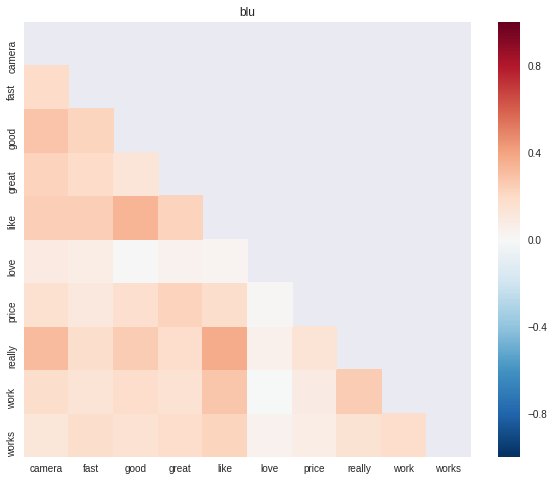

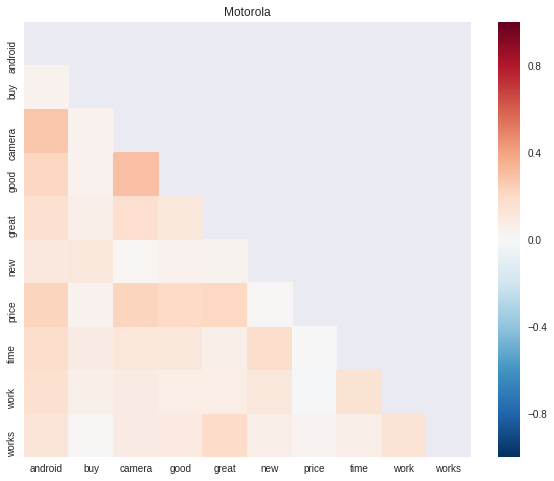

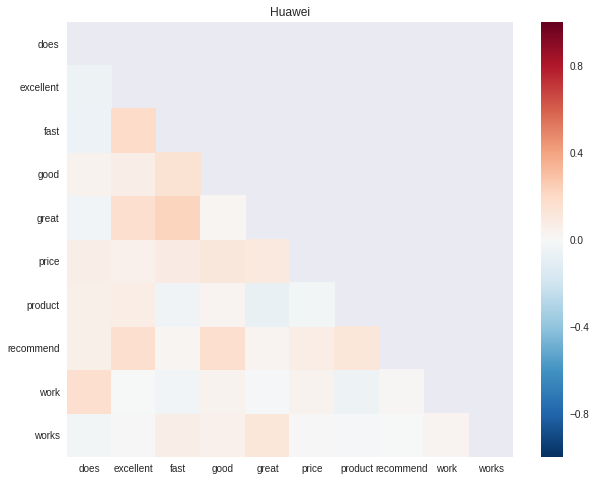

In [36]:
for brand in brands:
    top10 = final_df[final_df.brand == brand]
    # Use CountVectorizer to get most important words in reviews for each brands
    vectorizer = CountVectorizer(max_features=25, stop_words='english')
    X = vectorizer.fit_transform(top10.reviewText.values.astype('U'))
    word_list = vectorizer.get_feature_names()
    
    model = SelectKBest(k=10).fit(X, top10.overall) # X:model and Y:score
    informative_words_index = model.get_support(indices=True)
    labels = [word_list[i] for i in informative_words_index]
    data = pd.DataFrame(X[:, informative_words_index].todense(), columns=labels)
    
    correlation_matrix = data.corr()
    fig, ax = plt.subplots(figsize=(10, 8))
    mask = np.zeros_like(correlation_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(correlation_matrix, mask=mask,  ax=ax)
    ax.set_title(brand)
    fig.show()

# Plan for the future

- Read papers in order to begin the sentiment analysis based on words in reviews (maybe use word vectors) and some machine learning techniques like K-means.
- Implement the algorithms for extracting the most revelant features in order to describe the phone product.
- Update this algorithm to take in account the sentiment analysis.
- We think we will make a PDF report, so we have to begin early.
- If we have enough time, we have to think on the possibility of merging phone products which are the same model. The problem is on the way to merge, because the string distance between "iPhone 5S" and "iPhone 4S" is not too far to distinguish them. We have to study a way of preprocess the titles. 

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier



In [38]:
final_df.reviewText.count()

56205

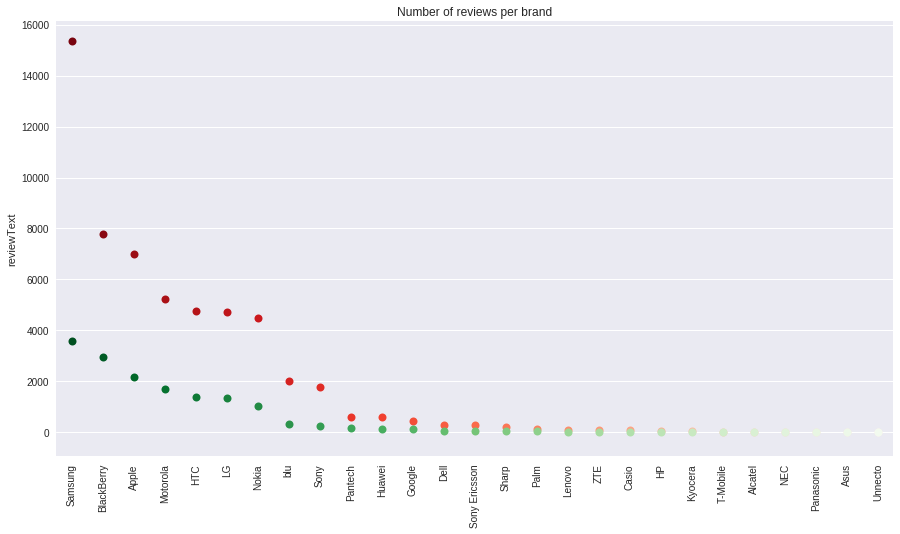

In [268]:
fig, ax = plt.subplots(figsize=(15,8))
review_number = final_df.groupby('brand')['reviewText'].count().sort_values(ascending=False)
negative_ratings = final_df.query('overall <= 2')
positive_ratings = final_df.query('overall >= 4')

negative = negative_ratings.groupby('brand')['reviewText'].count().sort_values(ascending=False)
positive = positive_ratings.groupby('brand')['reviewText'].count().sort_values(ascending=False)

d = [i for i in range(0, len(review_number))]
ax = sns.stripplot(d, review_number, size=8, palette="Reds_r")
ax = sns.stripplot(d, negative, size=8, palette="Greens_r")
#ax = sns.stripplot(d, positive, size=8, palette="Blues_r")

ax.set_xticklabels(review_number.index, rotation='vertical')
ax.set_title('Number of reviews per brand')
plt.show()

Brand:  Samsung
size:  (3572, 20)


/home/kristina/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Brand:  LG
size:  (1389, 20)
Brand:  Nokia
size:  (1024, 20)
Brand:  Sony
size:  (257, 20)
Brand:  Apple
size:  (2161, 20)
Brand:  BlackBerry
size:  (2959, 20)
Brand:  HTC
size:  (1711, 20)
Brand:  blu
size:  (327, 20)
Brand:  Motorola
size:  (1359, 20)
Brand:  Huawei
size:  (123, 20)


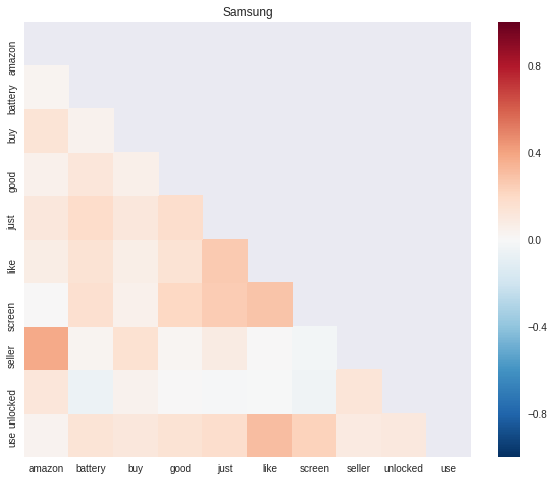

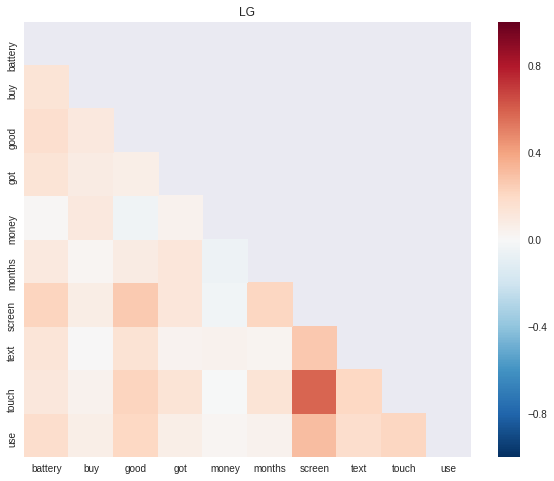

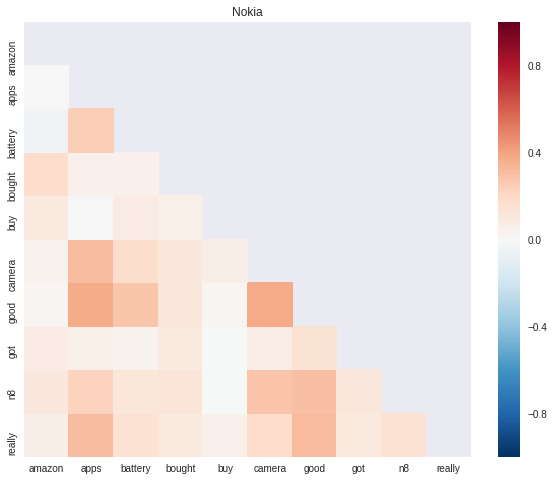

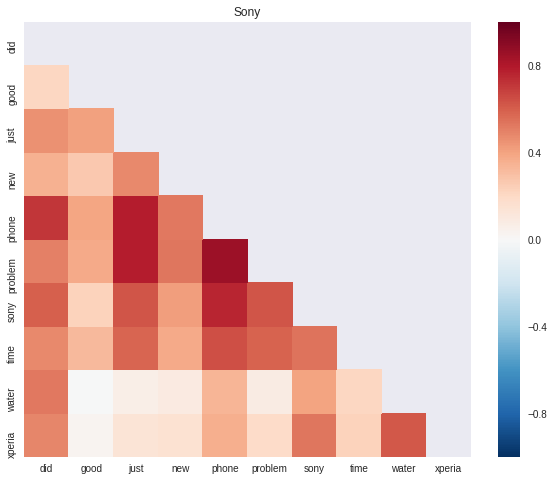

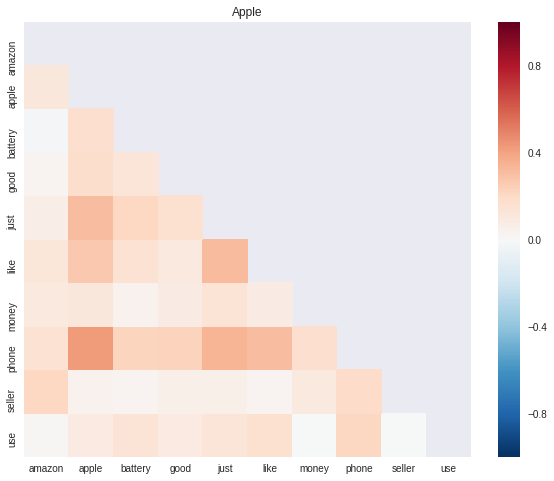

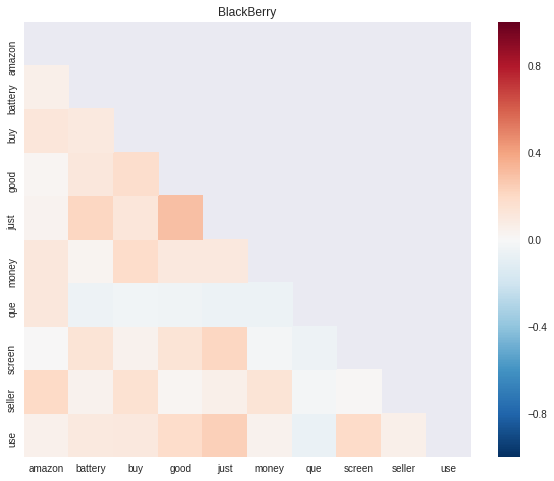

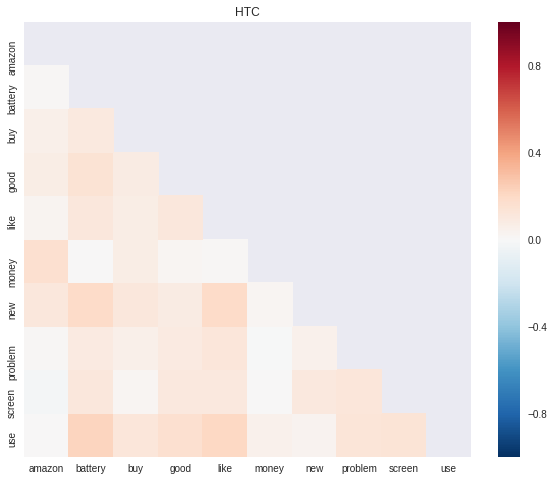

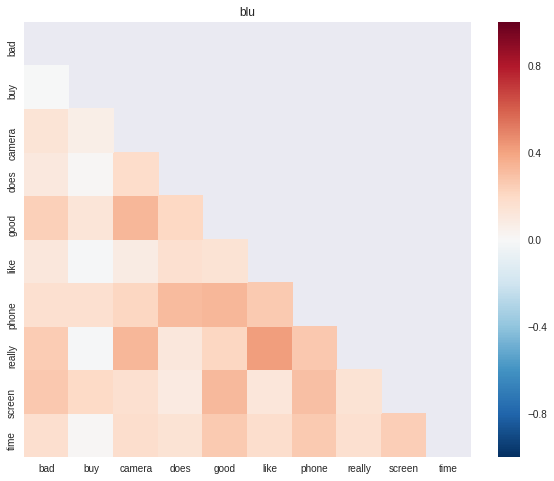

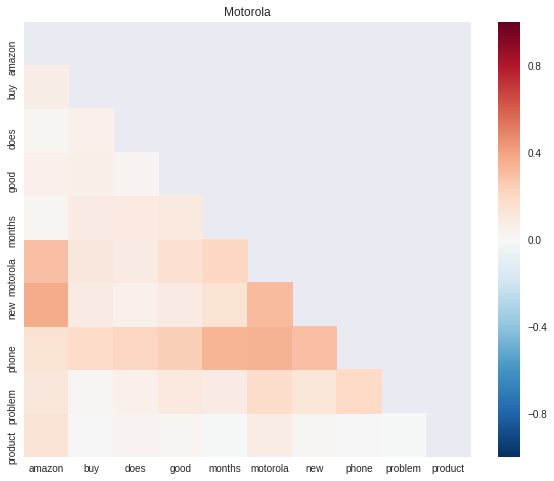

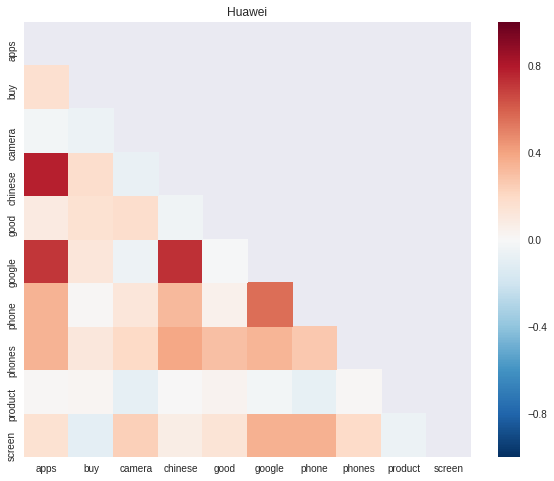

In [40]:
for brand in brands:
    print ("Brand: ", brand)
    top10 = negative_ratings[negative_ratings.brand == brand]
    print ("size: ", top10.shape)
    
    # Use CountVectorizer to get most important words in reviews for each brands
    vectorizer = CountVectorizer(max_features=25, stop_words='english')
    X = vectorizer.fit_transform(top10.reviewText.values.astype('U'))
    word_list = vectorizer.get_feature_names()
    #print ("Word list: ", word_list)
    model = SelectKBest(k=10).fit(X, top10.overall) # X:model and Y:score
    informative_words_index = model.get_support(indices=True)
    labels = [word_list[i] for i in informative_words_index]
    data = pd.DataFrame(X[:, informative_words_index].todense(), columns=labels)
    
    correlation_matrix = data.corr()
    fig, ax = plt.subplots(figsize=(10, 8))
    mask = np.zeros_like(correlation_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(correlation_matrix, mask=mask,  ax=ax)
    ax.set_title(brand)
    fig.show()

size:  (216, 20)


/home/kristina/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


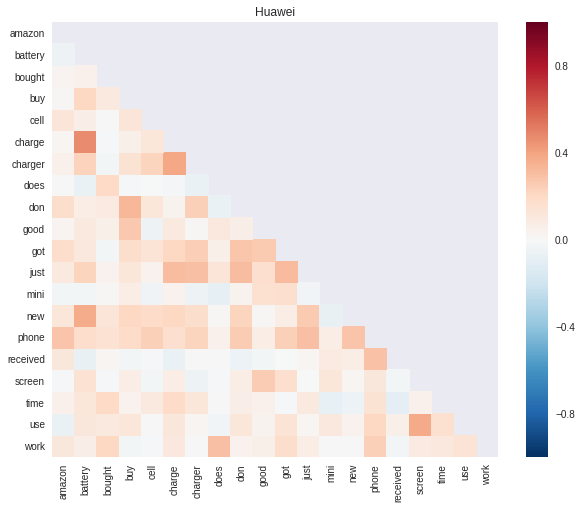

In [41]:
#print ("Brand: ", brand)
#top10 = positive_ratings[positive_ratings.brand == 'Samsung']
top10 = negative_ratings.query('title == \'Samsung Galaxy S3 GT-i8190 Mini Blue 8GB factory Unlocked 3G 900/1900/2100\'')
print ("size: ", top10.shape)
    
    # Use CountVectorizer to get most important words in reviews for each brands
vectorizer = CountVectorizer(max_features=25, stop_words='english')
X = vectorizer.fit_transform(top10.reviewText.values.astype('U'))
word_list = vectorizer.get_feature_names()
    #print ("Word list: ", word_list)
model = SelectKBest(k=20).fit(X, top10.overall) # X:model and Y:score
informative_words_index = model.get_support(indices=True)
labels = [word_list[i] for i in informative_words_index]
data = pd.DataFrame(X[:, informative_words_index].todense(), columns=labels)
    
correlation_matrix = data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(correlation_matrix, mask=mask,  ax=ax)
ax.set_title(brand)
fig.show()

In [206]:
#positive_model_reviews = positive_ratings.query('title == \'Samsung Galaxy S3 GT-i8190 Mini Blue 8GB factory Unlocked 3G 900/1900/2100\'')
#negative_model_reviews = negative_ratings.query('title == \'Samsung Galaxy S3 GT-i8190 Mini Blue 8GB factory Unlocked 3G 900/1900/2100\'')

print(positive_model_reviews.shape)
print(negative_model_reviews.shape)

interesting_words_hardcoded = ['battery', 'cell', 'touch', 'screen', 'camera','price','money']

#positive_model_reviews.head()

(924, 20)
(216, 20)


In [118]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [44]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [175]:
def show_freq_dist(df, interesting_words):
    ps = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    
    stop = stopwords.words('english') + list(string.punctuation) + ["..."] + ["'s"]
    
    # tokenize dataframe
    tokens = nltk.tokenize.word_tokenize(df.reviewText.to_string())
    print ("Number of tokens before cleaning: ", len(tokens))
    
    # remove stop words
    tokens_filtered = [token.lower() for token in tokens]
    tokens_filtered = [token for token in tokens_filtered if token not in stop]
    print ("Number of tokens after cleaning: ", len(tokens_filtered))
    
    # stem the words
    #tokens_filtered = [ps.stem(token) for token in tokens_filtered]
    
    # lemmatize words
    tokens_filtered = [lemmatizer.lemmatize(token) for token in tokens_filtered]
    
    fd = nltk.FreqDist(tokens_filtered)
    #for i in interesting_words:
    #    print (i, " : ",fd[i])


    #print (fd.most_common(10))
    fd.plot(25,cumulative=False)

Number of tokens before cleaning:  11062
Number of tokens after cleaning:  5346


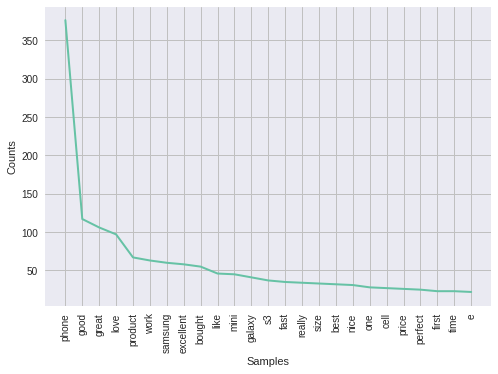

Number of tokens before cleaning:  2556
Number of tokens after cleaning:  1208


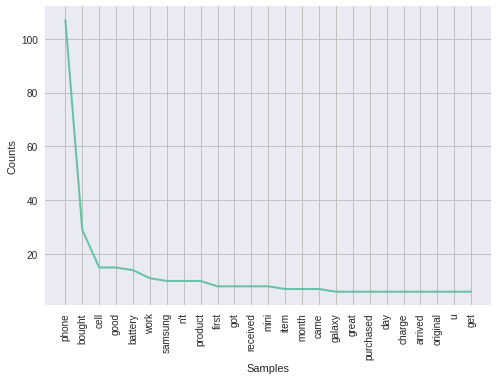

In [176]:
interesting_words =  ['battery', 'cell', 'touch', 'screen', 'camera','price','money', "size"]
show_freq_dist(positive_model_reviews, interesting_words)
show_freq_dist(negative_model_reviews, interesting_words)

Number of tokens before cleaning:  11062
Number of tokens after cleaning:  5346


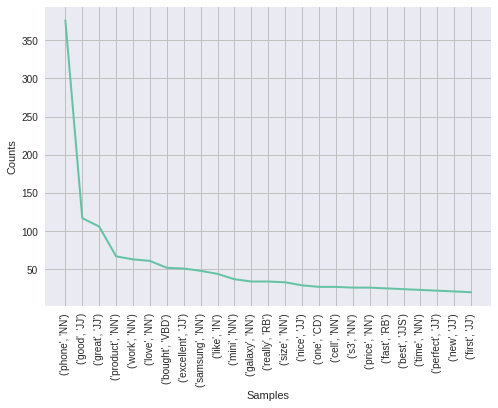

[('34903', 'CD'), ('excelente', 'JJ'), ('lo', 'NN'), ('cambiar', 'NN'), ('iacute', 'NN'), ('por', 'NN'), ('ning', 'VBG'), ('uac', 'JJ'), ('34904', 'CD'), ('fine', 'JJ'), ('recommend', 'NN'), ('34905', 'CD'), ('got', 'VBD'), ('phone', 'NN'), ('say', 'VBP')]


In [173]:
# # Porter stemmer example ^ import in the algorithm up, or lemmatizer maybe? 
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()

# ps = PorterStemmer()
#for word in tokens_filtered[0:10]:
    #print (ps.stem(word))
    #print (lemmatizer.lemmatize(word))


def test(df):
    ps = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    
    stop = stopwords.words('english') + list(string.punctuation) + ["..."] + ["'s"]
    
    # tokenize dataframe
    tokens = nltk.tokenize.word_tokenize(df.reviewText.to_string())
    print ("Number of tokens before cleaning: ", len(tokens))
    
    # remove stop words
    tokens_filtered = [token.lower() for token in tokens]
    tokens_filtered = [token for token in tokens_filtered if token not in stop]
    print ("Number of tokens after cleaning: ", len(tokens_filtered))
    
   
    # stem the words
    #tokens_filtered = [ps.stem(token) for token in tokens_filtered]
    
    # lemmatize words
    tokens_filtered = [lemmatizer.lemmatize(token) for token in tokens_filtered]
    
    #tag the tokens
    tokens_filtered = nltk.pos_tag(tokens_filtered)
    
    
    fd = nltk.FreqDist(tokens_filtered)
    #for i in interesting_words:
    #    print (i, " : ",fd[i])


    #print (fd.most_common(10))
    word_features = list(fd.keys())[:3000]
    
    fd.plot(25,cumulative=False)
    return word_features
    
word_features = test(positive_model_reviews)
print (word_features[0:15])

In [279]:
def get_words(review):
    stop = stopwords.words('english') + list(string.punctuation) + ["..."] + ["'s"]
    tokens = nltk.tokenize.word_tokenize(str(review))
    tokens_filtered = [token.lower() for token in tokens]
    tokens_filtered = [token for token in tokens_filtered if token not in stop]
    tokens_filtered = [lemmatizer.lemmatize(token) for token in tokens_filtered]
    return tokens_filtered

In [282]:
# try out naive bayes classifier

def form_review(review):
    p = get_words(review)
    s = {word: True for word in get_words(review)}
    return s

#positive_model_reviews = positive_ratings.query('title == \'Samsung Galaxy S3 GT-i8190 Mini Blue 8GB factory Unlocked 3G 900/1900/2100\'')
#negative_model_reviews = negative_ratings.query('title == \'Samsung Galaxy S3 GT-i8190 Mini Blue 8GB factory Unlocked 3G 900/1900/2100\'')

positive_model_reviews = positive_ratings
negative_model_reviews  = negative_ratings

print (positive_model_reviews.shape)
print (negative_model_reviews.shape)

positive_reviews_list = list(positive_model_reviews.reviewText)
negative_reviews_list = list(negative_model_reviews.reviewText)

positive_data = []
negative_data = []


for review in positive_reviews_list[0:10000]:
    positive_data.append([form_review(review), 'pos'])
    
for review in negative_reviews_list[0:10000]:
    negative_data.append([form_review(review), 'neg'])

print (len(train))
train_data = positive_data[0:9000] + negative_data[0:9000]
test_data = positive_data[9000:] + negative_data[9000:]

(35684, 20)
(15524, 20)
51208


In [283]:
from nltk import NaiveBayesClassifier

model = NaiveBayesClassifier.train(train_data)

In [284]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(model, test_data))*100)

Classifier accuracy percent: 83.89999999999999


In [285]:
model.show_most_informative_features(5)

Most Informative Features
               excelente = True              pos : neg    =     65.0 : 1.0
                perfecto = True              pos : neg    =     41.8 : 1.0
                    scam = True              neg : pos    =     37.7 : 1.0
                perfecta = True              pos : neg    =     32.3 : 1.0
                   false = True              neg : pos    =     26.2 : 1.0


In [286]:
# maxent_classifier = nltk.MaxentClassifier.train(train_data, "megam")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

for sentence in positive_reviews_list:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in ss:
        print(k," : ", ss[k])
    print()

I didn't buy from this seller, but I owned this phone when it first came out.  It is by far one of the best cell phones I've ever owned.  It has great reception, the sound quality is superb, and is very very sturdy.  My phone was dropped down the stairs, dropped in a puddle, left out in the sun at the beach where little grains of sand got everywhere and it functioned just fine.  The material it's made of is really tough and doesn't scratch easily if you take care not to drop it often.  The only problem I found with this phone is that it has a really poor camera and tiny screen.  Everything else was above par.  Hope this helps!  :)
neg  :  0.083
neu  :  0.674
pos  :  0.244
compound  :  0.9819

I've been using a Motorola V190 for well over 2 years and figured I need a similar phone as replacement. I wasn't disappointed - keypad and controls were similar, audio was great in a thinner package. While battery capacity was limited it made for a slimmer phone I could tuck in a belt holster wit


No problem with it and still working after all these years buying the same cell phone for the 2nd time.
neg  :  0.214
neu  :  0.786
pos  :  0.0
compound  :  -0.5994

Yes I know. The Razr is no longer the cooles phone on the market, but I still own this own and likt it. The screen is much bigger than in previous models. The reception is very clear, doesnt drop too may calls either. The camera is namesake, does not take very good pictures. But then again it is not meant too. If you want a phone with good sound quality, reception and small size then get this one. if you want all the fancy gizmos and gadgets in your phone then this is prbably not for you.
neg  :  0.08
neu  :  0.814
pos  :  0.106
compound  :  0.1871

Just bought this phone for a friend in the Philippines,sound is good and its a beautiful phone.just what I wanted.
neg  :  0.0
neu  :  0.583
pos  :  0.417
compound  :  0.875

This is the fourth RAZR phone for us.  It provides everything we expect in a cell phone and comes in a

compound  :  0.9515

It's really great.  I used the phone in India and it works really good.Thanks,Suguna Reddy
neg  :  0.0
neu  :  0.747
pos  :  0.253
compound  :  0.659

I have only had this phone for 3 weeks and I love it.I only use it as a phone and a camera.  I send text messages, too.I have not used the web, MP3 player, or speaker yet.It is beautiful.My only complaint is that it seems to get dirty quickly with regular handling.
neg  :  0.098
neu  :  0.822
pos  :  0.08
compound  :  0.0258

Okay, first of all, the review down below which states this phone is only for homosexuals is complete garbage. I'm a heterosexual male and I think this cell is AWESOME!! I've gotten loads of compliments from people asking where I got it, and it also functions as a good cell phone and isn't all about the look. The only problem I have is that when you're trying to sign onto AIM, or download ringtones, photos, etc, it takes FOREVER. Some of the instant messages don't even go through. However, if yo

neu  :  0.776
pos  :  0.224
compound  :  0.866

The original Razr phone was pretty much my favorite phone.  It had looks, functionality, and slimness.  Tastes in fashion change and so do phones.  However, I just wanted the ability to call and text on a handy flip phone.This phone is the technology of a decade ago so the graphics and features one expects of today's phone will not be here.  Construction quality is the standard of years ago so it may not feel as solid as many of today's phones.For what I want it do, it is uncomplicated and inexpensive.  It's been reliable and the performance in receiving and transmitting gives me no reasons for complaint.There is no comparing it to today's multipurpose smartphones.  Today's phones can do so much more.  I didn't want a phone to do so much more.  Make and take phonecalls, send and receive texts, voicemessages, and a phonebook is all I needed and that what I got in a good looking easy to use device, which is what the Razr is.Put in your SIM 

pos  :  0.191
compound  :  0.9724

EXCELENTE
neg  :  0.0
neu  :  1.0
pos  :  0.0
compound  :  0.0

Is a good phone and work very good, is all that I want, the keyboard is very easy and soft.
neg  :  0.0
neu  :  0.576
pos  :  0.424
compound  :  0.8516

me parecencia un buen producto para mis necesidades y para lo que voy a necesitar me p&aacute;rese excelente y tienes buenas caracter&iacute;sticas en lo personal
neg  :  0.0
neu  :  1.0
pos  :  0.0
compound  :  0.0

Very good phone. This product is of excellent quality. Meets all specifications provided by the manufacturer and its performance is superior. I highly recommend it.
neg  :  0.0
neu  :  0.603
pos  :  0.397
compound  :  0.9214

Excelente experiencia al comprar a traves de este medio y la tienda cumplio con lo ofertado en un 100% el envio llego oportuno y el empaquetado del producto excelente, los recomiendo ampliamente, volvere a adquirir sus productos. Saludos desde Venezuela.
neg  :  0.0
neu  :  1.0
pos  :  0.0
compound  :  0

neu  :  0.544
pos  :  0.456
compound  :  0.7717

i love this phone bought after it was used for 2 years then i used for 2 years and still works great
neg  :  0.0
neu  :  0.658
pos  :  0.342
compound  :  0.8519

The phone was just as described. The battery life is the negative I see with this model. I got a second battery thinking that the original may not have much life, but the new one does not last any longer. The phone itself is great.
neg  :  0.048
neu  :  0.802
pos  :  0.15
compound  :  0.714

I absolutely LOVE this phone. I always used to break my cell by either dropping it, or getting it wet because my hands always gets REALLY sweaty from a syndrome I have. I used to go through a cell every 3 months or so! I still have my verizon dare & i think it's been around 3 years to date!  I dislike all the other iphone, droids, etc., because they are all "heat" sensored (& if your hands are cold, goodluck 2 you)... I am a girl, and I have nails!!! This verizon dare works with a single nai


Celular barato, que vale lo que le precio pide 99$, puede leer PDF sin instalar nada extra aunque igual es incomodo por el tamano, lo que se podria mejorar ,,,entrada para audifonos regular y un mejor modem ya que navega a maximo 48 kbs...Sirve en Costa Rica sin ningun problema
neg  :  0.135
neu  :  0.865
pos  :  0.0
compound  :  -0.802

I just received this phone and so far am very pleased with it. It gets much better reception in my house than my last four phones, all on the same network. I have not had any dropped calls and I was always having that with my prior phones.The only negative I have with it is that the instruction booklet was in Polish and when I went to LG's website they did not have any info on the KP500. It took me a while to figure out the setup and how to get it connected to my computer so I could add my own ringtones.Keep in mind that I mostly use a phone as a phone, not for internet.I am very pleased with this phone and feel it is definitely worth what I paid for 

pos  :  0.079
compound  :  0.6249

Buy a blackberry 8900 on Unlocked Cellphone Kings and sold me this blackberry that did not work, sold him the damaged card, they tricked me because if they knew that the cellphone did not work because sent him ..... I spent all my savings to buy a phone that does not work ... And now I have nothing, no money and the cell damage .. Now I have to buy a card mother that costs US$65 ... Trusting him and selling me something useless?????They sell a refurbished cellphones, and a person buys as NewGive me back my money and I'll return your damaged Blackberry 8900Answer me as fast as possible PLEASEThanks You!!
neg  :  0.106
neu  :  0.854
pos  :  0.04
compound  :  -0.8204

I love this  BB . it is comfortable easy to use, has a good camera with flash. the only  part of 8900 i  do not like is the ball scroller
neg  :  0.058
neu  :  0.577
pos  :  0.365
compound  :  0.904

i love it. the blackberry phone is excellent, is very beautifull and good, thanks you. comf

AttributeError: 'float' object has no attribute 'encode'

In [204]:
# So now, conclude that people's reviews and grades are fine, they are consistent, interesting word features


In [105]:
# Collocations (n-grams)
finder = nltk.collocations.BigramCollocationFinder.from_words(tokens_filtered)
bigram_measures = nltk.collocations.BigramAssocMeasures()
# explore measures for different outcomes!
finder.nbest(bigram_measures.pmi, 10)

[("'ll", '35340'),
 ('-solid-changeable', 'battery-micro'),
 ('.it', '39067'),
 ('1.-', 'customers'),
 ('1000', 'tanto'),
 ('200', 'dollars'),
 ('240', 'buck'),
 ('300', '35604'),
 ('34922', 'recibi'),
 ('34942', 'cheaper')]

In [293]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
 
cvec = CountVectorizer(stop_words='english', min_df=1, max_df=.5, ngram_range=(1,2))
cvec

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [309]:
from itertools import islice


positive_reviews_list = final_df.query("overall >= 4").reviewText.dropna()
negative_reviews_list = final_df.query("overall <= 2").reviewText.dropna()

cvec.fit(positive_reviews_list)
list(islice(cvec.vocabulary_.items(), 50))

[('didn', 158920),
 ('buy', 85475),
 ('seller', 494768),
 ('owned', 390755),
 ('came', 90083),
 ('far', 202441),
 ('best', 65136),
 ('cell', 100398),
 ('phones', 409542),
 ('ve', 598815),
 ('great', 242367),
 ('reception', 457856),
 ('sound', 524308),
 ('quality', 445302),
 ('superb', 542389),
 ('sturdy', 539291),
 ('dropped', 173132),
 ('stairs', 530790),
 ('puddle', 441998),
 ('left', 305605),
 ('sun', 541856),
 ('beach', 62177),
 ('little', 316245),
 ('grains', 241644),
 ('sand', 483687),
 ('got', 239213),
 ('functioned', 225248),
 ('just', 291777),
 ('fine', 211863),
 ('material', 337512),
 ('really', 454444),
 ('tough', 571379),
 ('doesn', 167179),
 ('scratch', 487632),
 ('easily', 176529),
 ('care', 96229),
 ('drop', 172799),
 ('problem', 432665),
 ('poor', 422670),
 ('camera', 90959),
 ('tiny', 566762),
 ('screen', 488252),
 ('par', 394337),
 ('hope', 262030),
 ('helps', 258097),
 ('didn buy', 158979),
 ('buy seller', 86293),
 ('seller owned', 495218),
 ('owned phone', 390974),


In [310]:
# Check how many total n-grams we have
len(cvec.vocabulary_)

634526

In [311]:
cvec_counts = cvec.transform(positive_reviews_list)
print ('sparse matrix shape:', cvec_counts.shape)
print ('nonzero count:', cvec_counts.nnz)
print ('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])) )

sparse matrix shape: (35678, 634526)
nonzero count: 2276575
sparsity: 0.01%


In [312]:
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': cvec.get_feature_names(), 'occurrences': occ})
counts_df.sort_values(by='occurrences', ascending=False).head(20)

,occurrences,term
242367,15025,great
235932,14597,good
310638,10809,like
590204,10752,use
488252,9644,screen
291777,9140,just
60013,8505,battery
90959,7340,camera
625449,7250,works
283832,7185,iphone


In [313]:
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

<35678x634526 sparse matrix of type '<class 'numpy.float64'>'
	with 2276575 stored elements in Compressed Sparse Row format>

In [314]:
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

,term,weight
235932,good,0.020663
242367,great,0.019331
326061,love,0.012772
310638,like,0.011908
625449,works,0.011411
590204,use,0.011062
291777,just,0.009934
191608,excellent,0.009039
488252,screen,0.009025
429736,price,0.008999


In [315]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(stop_words='english')
tvec_weights = tvec.fit_transform(positive_reviews_list)
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

,term,weight
26546,phone,0.077667
16493,good,0.038942
16804,great,0.037922
21632,love,0.024945
21196,like,0.023228
39334,works,0.022927
37639,use,0.021708
20252,just,0.019617
27766,price,0.018169
24136,new,0.017834


In [ ]:
# TODO: 
# do the same ^ for negative reviews, just to check what is happening there
# write some conclusions for reviews overall, for example notice that battery is appearing
# maybe check for n-grams when battery is appearing

In [316]:
# same as above but for negative words

tvec = TfidfVectorizer(stop_words='english')
tvec_weights = tvec.fit_transform(negative_reviews_list)
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

,term,weight
17100,phone,0.082402
25653,work,0.023278
3400,battery,0.022618
15599,new,0.022535
4362,buy,0.019699
20534,screen,0.018958
24559,use,0.018707
24260,unlocked,0.018571
4021,bought,0.017566
13198,just,0.017359


In [334]:
# # n-grams
# from nltk.collocations import BigramCollocationFinder


# # final_reviews = list(final_df.reviewText.dropna())
# # final_words = []

# # for review in final_reviews:
# #     final_words.append([form_review(review)])
    
# test = nltk.word_tokenize(final_df.reviewText.dropna())    

# finder = nltk.collocations.BigramCollocationFinder.from_words(["I have tra la la", "la la "])
# bigram_measures = nltk.collocations.BigramAssocMeasures()
# # explore measures for different outcomes!
# finder.nbest(bigram_measures.pmi, 10)
print (final_df.shape)

(56222, 20)
